# Topological Data Analysis Tutorial

Me following along Brandon Brown's [tutorial][tut-page].

[tut-page]: http://outlace.com/TDApart2.html

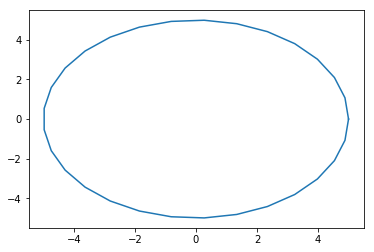

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Number of points to generate
n = 30

# Generate space of parameter
theta = np.linspace(0, 2.0 * np.pi, n)

a, b, r = 0.0, 0.0, 5.0

x = a + r * np.cos(theta)
y = b + r * np.sin(theta)

# Code to plot the circle for visualization
plt.plot(x, y)
plt.show()

We will now sample from this ellipse.

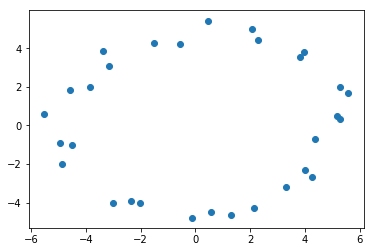

In [5]:
# The calls to np.random.uniform are to add some noise to the points.
x2 = np.random.uniform(-0.75, 0.75, n) + x
y2 = np.random.uniform(-0.75, 0.75, n) + y

fig, ax = plt.subplots()
ax.scatter(x2, y2)
plt.show()

As expected, the sampled points look circular, hinting at something going on with the data this was sampled from.  We would like our simplicial copmlex to capture this property.  

The construction of the VR complex will follow the following steps:

* Define a distance function.  For this particular data set, we will use the Euclidean distance metric, $d(a, b) = \sqrt{(a_1 - b_1)^2 + (a_2 - b_2)^2}$.
* Choose some $\epsilon$ to build our simplicial complex.
* Create a collection of the 0-simplices of the VR complex.
* Calculate distance for each pair of points.  If the distance between the points is less than $\epsilon$, add an edge between the points: this generates a 1-complex.
* Once we've discovered all 1-simplices, iterate through each vertex and attempt to build higher dimensional simplices incrementally.  In other words, we'll add all 2-simplices to our graph, than add all 3-simplices to that graph, etc.